In [2]:
epsilon = ["infinity","500","100","50","40","30","20","10","5","4","3","2","1"]
TPR_all = [0.8,0.74,0.74,0.72,0.72,0.71,0.70,0.68,0.65,0.65,0.63,0.61,0.57]
TPR_white = [0.8,0.76,0.76,0.76,0.75,0.75,0.75,0.74,0.72,0.70,0.69,0.66,0.63]
TPR_asian = [0.76,0.70,0.68,0.68,0.68,0.66,0.65,0.63,0.60,0.59,0.57,0.56,0.51]
TPR_black= [0.84,0.77,0.77,0.74,0.73,0.72,0.71,0.67,0.65,0.64,0.63,0.62,0.57]
TPR_female= [0.75,0.69,0.69,0.67,0.66,0.65,0.65,0.63,0.59,0.57,0.54,0.49,0.42]
TPR_male= [0.84,0.79,0.78,0.77,0.77,0.77,0.75,0.72,0.71,0.71,0.71,0.72,0.71]

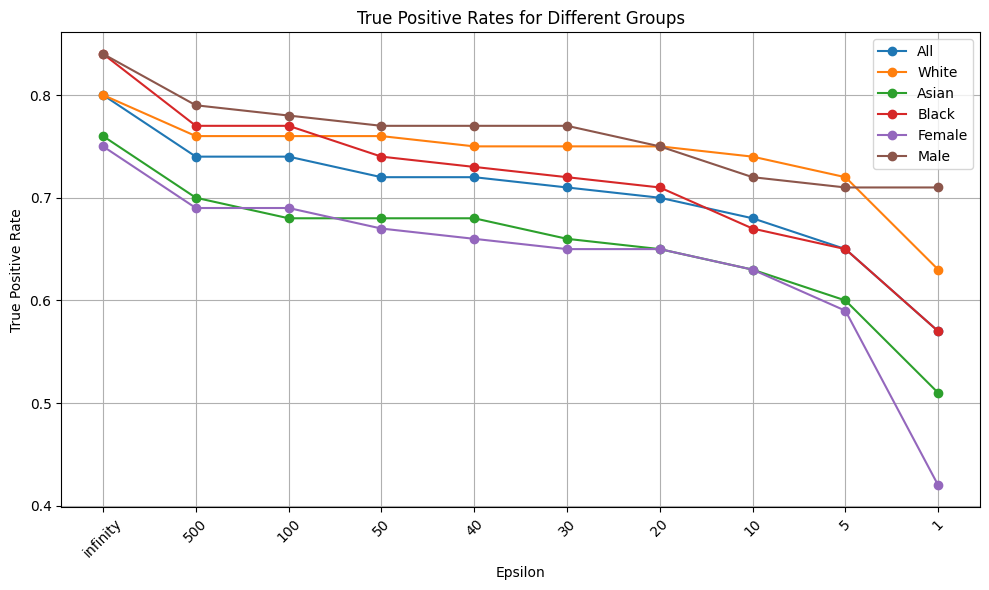

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.plot(epsilon, TPR_all, marker='o', label='All')
plt.plot(epsilon, TPR_white, marker='o', label='White')
plt.plot(epsilon, TPR_asian, marker='o', label='Asian')
plt.plot(epsilon, TPR_black, marker='o', label='Black')
plt.plot(epsilon, TPR_female, marker='o', label='Female')
plt.plot(epsilon, TPR_male, marker='o', label='Male')

plt.xlabel('Epsilon')
plt.ylabel('True Positive Rate')
plt.title('True Positive Rates for Different Groups')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

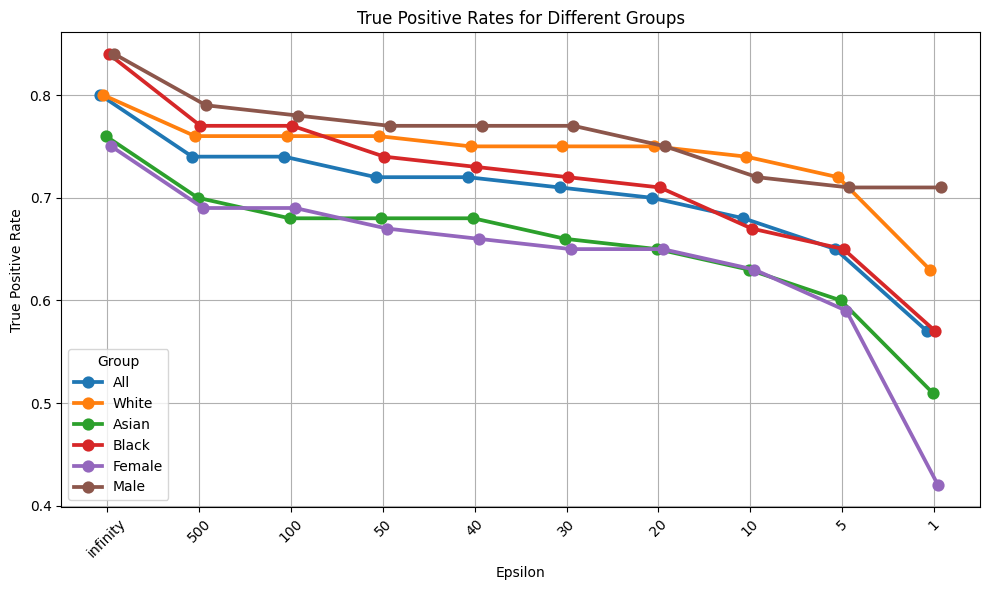

In [4]:
import seaborn as sns
# Create a DataFrame
import pandas as pd
df = pd.DataFrame({
    'epsilon': epsilon * 6,
    'TPR': TPR_all + TPR_white + TPR_asian + TPR_black + TPR_female + TPR_male,
    'Group': ['All'] * 10 + ['White'] * 10 + ['Asian'] * 10 + ['Black'] * 10 + ['Female'] * 10 + ['Male'] * 10
})

plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='epsilon', y='TPR', hue='Group', dodge=True)
plt.xlabel('Epsilon')
plt.ylabel('True Positive Rate')
plt.title('True Positive Rates for Different Groups')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

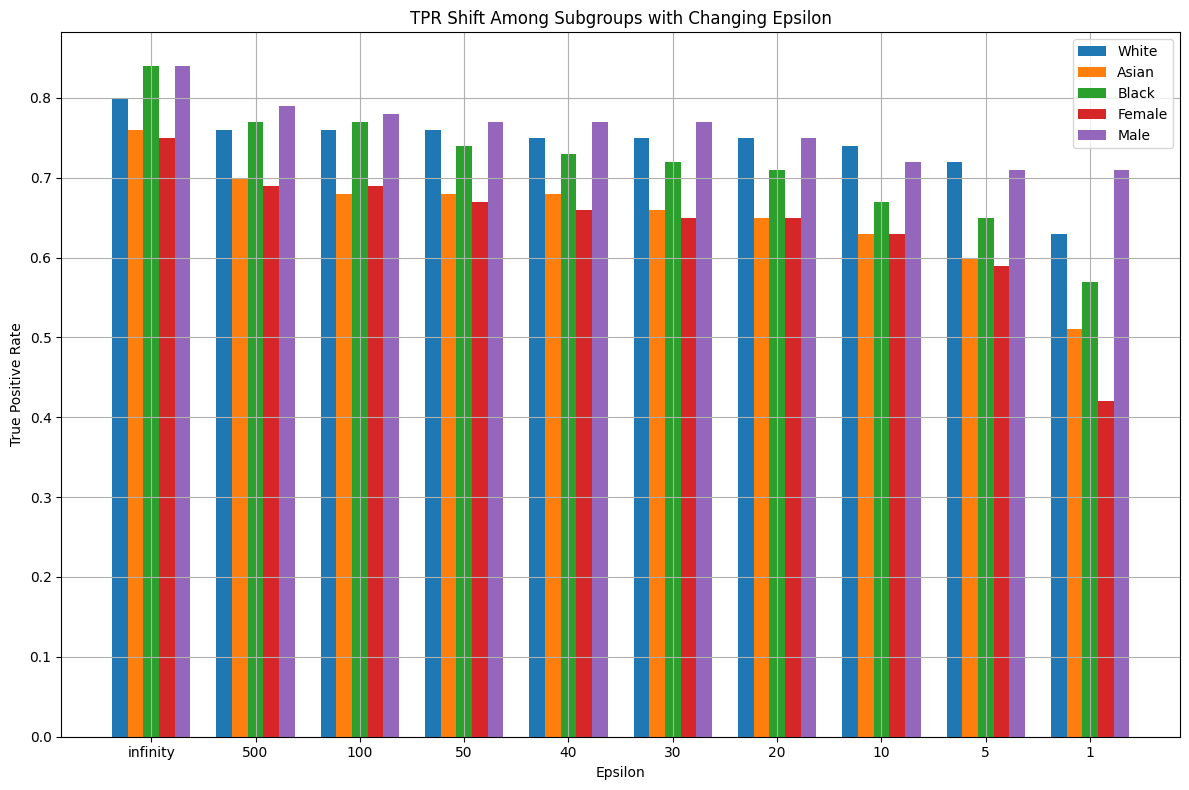

In [5]:
import numpy as np
bar_width = 0.15
index = np.arange(len(epsilon))

plt.figure(figsize=(12, 8))

plt.bar(index, TPR_white, bar_width, label='White')
plt.bar(index + bar_width, TPR_asian, bar_width, label='Asian')
plt.bar(index + 2*bar_width, TPR_black, bar_width, label='Black')
plt.bar(index + 3*bar_width, TPR_female, bar_width, label='Female')
plt.bar(index + 4*bar_width, TPR_male, bar_width, label='Male')

plt.xlabel('Epsilon')
plt.ylabel('True Positive Rate')
plt.title('TPR Shift Among Subgroups with Changing Epsilon')
plt.xticks(index + 2*bar_width, epsilon)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

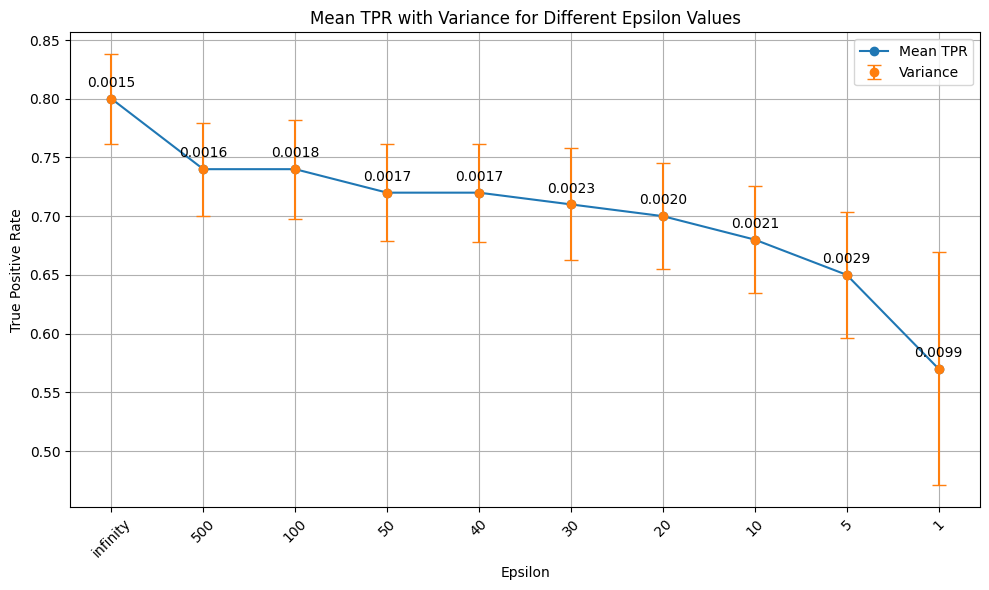

In [15]:
import numpy as np

# Define TPR values for all subgroups
TPR_values = [TPR_white, TPR_asian, TPR_black, TPR_female, TPR_male]

# Convert TPR values to numpy array for easier computation
TPR_array = np.array(TPR_values)

# Calculate variance for each epsilon value
variance_TPR = np.var(TPR_array, axis=0)

plt.figure(figsize=(10, 6))
# Plot connected data points for mean TPR
plt.plot(epsilon, TPR_all, marker='o', linestyle='-', label='Mean TPR')

# Plot error bars representing variance
plt.errorbar(epsilon, TPR_all, yerr=np.sqrt(variance_TPR), fmt='o', capsize=5, label='Variance')

# Add labels for variance values
for i, var in enumerate(variance_TPR):
    plt.text(epsilon[i], TPR_all[i] + 0.01, f'{var:.4f}', ha='center')

plt.xlabel('Epsilon')
plt.ylabel('True Positive Rate')
plt.title('Mean TPR with Variance for Different Epsilon Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()